In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
from fastai.tabular import *
from pathlib import Path
import requests
import pandas as pd
from fastai import *
from fastai.tabular import *
from fastai.callbacks import *
from fastai.text import *
from fastai.metrics import accuracy
from urllib.parse import urlparse

In [3]:
path = Path('data').mkdir(exist_ok=True)
!wget -P data/ https://data.webarchive.org.uk/opendata/ukwa.ds.1/classification/classification.tsv

--2020-05-01 16:39:38--  https://data.webarchive.org.uk/opendata/ukwa.ds.1/classification/classification.tsv
Resolving data.webarchive.org.uk (data.webarchive.org.uk)... 185.199.108.153, 185.199.111.153, 185.199.110.153, ...
Connecting to data.webarchive.org.uk (data.webarchive.org.uk)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3011797 (2.9M) [text/tab-separated-values]
Saving to: ‘data/classification.tsv’

classification.tsv  100%[===================>]   2.87M  --.-KB/s    in 0.07s   

2020-05-01 16:39:38 (42.6 MB/s) - ‘data/classification.tsv’ saved [3011797/3011797]



In [4]:
df = pd.read_csv('data/classification.tsv',sep='\t', error_bad_lines=False)

b'Skipping line 199: expected 4 fields, saw 5\nSkipping line 597: expected 4 fields, saw 5\nSkipping line 614: expected 4 fields, saw 5\nSkipping line 683: expected 4 fields, saw 5\nSkipping line 1146: expected 4 fields, saw 5\nSkipping line 1411: expected 4 fields, saw 5\nSkipping line 1431: expected 4 fields, saw 5\nSkipping line 1532: expected 4 fields, saw 5\nSkipping line 1578: expected 4 fields, saw 5\nSkipping line 3299: expected 4 fields, saw 5\nSkipping line 3325: expected 4 fields, saw 5\nSkipping line 3375: expected 4 fields, saw 5\nSkipping line 3468: expected 4 fields, saw 5\nSkipping line 3469: expected 4 fields, saw 5\nSkipping line 3767: expected 4 fields, saw 5\nSkipping line 3770: expected 4 fields, saw 5\nSkipping line 3842: expected 4 fields, saw 5\nSkipping line 4150: expected 4 fields, saw 5\nSkipping line 5051: expected 4 fields, saw 5\nSkipping line 5290: expected 4 fields, saw 5\nSkipping line 5386: expected 4 fields, saw 5\nSkipping line 7298: expected 4 field

In [5]:
df.head(10)

,Primary Category,Secondary Category,Title,URL
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/
5,Arts & Humanities,Architecture,Architectural Humanities Research Association ...,http://www.ahra-architecture.org/
6,Arts & Humanities,Architecture,Architecture.com - from the Royal Institute of...,http://www.architecture.com/
7,Arts & Humanities,Architecture,Architecture.com: Royal Institute of British A...,http://www.architecture.com/TheRIBA/WhatTheRIB...
8,Arts & Humanities,Architecture,Architecture_media_politics_society,http://architecturemps.com/
9,Arts & Humanities,Architecture,Artek Design House Ltd,http://www.artek-design-house.co.uk/


In [6]:
df.columns

Index(['Primary Category', 'Secondary Category', 'Title', 'URL'], dtype='object')

In [ ]:
df['scheme'],df['netloc'],df['path'],df['params'],df['query'],df['fragment'] = zip(*df['URL'].map(urlparse))

In [ ]:
import re

regex_co_uk = re.compile("\.co\.uk")
regex_com = re.compile("\.com")
regex_org = re.compile("\.org$")
regex_org_uk = re.compile("\.org\.uk")
regex_ac_uk = re.compile("\ac.uk")
regexes = [regex_co_uk, 
           regex_com,
           regex_org ,
           regex_ac_uk,
          regex_org_uk]

In [ ]:
def split_domain(url):
    for r in regexes:
        m = r.findall(url)
        if m:
            #print(m)
            url = url.replace(m[0],'')
            return url, m[0]

In [ ]:
df['netloc'] = df.URL.apply(split_domain)

#df[['b1', 'b2']] = pd.DataFrame(df['b'].tolist(), index=df.index)

In [ ]:
df[['base', 'ext']] = pd.DataFrame(df['netloc'].tolist(), index=df.index)

In [12]:
df.head(5)

,Primary Category,Secondary Category,Title,URL,scheme,netloc,path,params,query,fragment,base,ext
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/,http,"(http://www.sixty8/, .com)",/,,,,http://www.sixty8/,.com
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/,http,"(http://www.abandonedcommunities/, .co.uk)",/,,,,http://www.abandonedcommunities/,.co.uk
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/,http,"(http://www.greekthomson/, .com)",/,,,,http://www.greekthomson/,.com
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/,http,"(http://www.arabbritishcentre/ , .org.uk)",/,,,,http://www.arabbritishcentre/,.org.uk
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/,http,None,/,,,,None,None


In [ ]:
df = df.drop(['URL','Secondary Category', 'netloc'],axis=1)

In [14]:
df['Primary Category'].value_counts()

Arts & Humanities                                              5299
Government, Law & Politics                                     4832
Business, Economy & Industry                                   2988
Society & Culture                                              2984
Science & Technology                                           2420
Medicine & Health                                              2164
Education & Research                                           2118
Company Web Sites                                               843
Digital Society                                                 737
Sports and Recreation                                           710
Religion                                                        417
Travel & Tourism                                                374
Social Problems and Welfare                                     270
Politics, Political Theory and Political Systems                123
Crime, Criminology, Police and Prisons          

In [ ]:
#data_tab = TabularDataBunch.from_df(path, df_tab, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)


In [15]:
df.columns

Index(['Primary Category', 'Title', 'scheme', 'path', 'params', 'query',
       'fragment', 'base', 'ext'],
      dtype='object')

In [ ]:
procs = [FillMissing, Categorify, Normalize]

In [ ]:
dep_var = 'Primary Category'
cat_names = [
             'scheme', 
             'base', 
             'path', 
             'params', 
             'ext']



In [18]:
sample = int(len(df)*0.3)
df_sample = df.sample(sample)
df_sample['is_valid'] = True
df['is_valid'] = False
dfs = [df, df_sample]
df = pd.concat(dfs)
df

,Primary Category,Title,scheme,path,params,query,fragment,base,ext,is_valid
0,Arts & Humanities,68 Dean Street,http,/,,,,http://www.sixty8/,.com,False
1,Arts & Humanities,Abandoned Communities,http,/,,,,http://www.abandonedcommunities/,.co.uk,False
2,Arts & Humanities,Alexander Thomson Society,http,/,,,,http://www.greekthomson/,.com,False
3,Arts & Humanities,"Arab British Centre, The",http,/,,,,http://www.arabbritishcentre/,.org.uk,False
4,Arts & Humanities,Architectural Association School of Architecture,http,/,,,,None,None,False
...,...,...,...,...,...,...,...,...,...,...
24317,Society & Culture,National Children's Bureau: Every Disabled Chi...,http,/edcm/,,,,http://www.ncb/edcm/,.org.uk,True
4283,Arts & Humanities,theory.org.uk,http,/,,,,http://www.theory/,.org.uk,True
19970,Religion,"Baptist Times, The",http,/,,,,http://www.baptisttimes/,.co.uk,True
16557,"Government, Law & Politics",Sandy Preposterous Richardson : your independe...,http,/,,,,http://www.sandypreposterousrichardson/,.co.uk,True


In [ ]:
path = Path('.')

In [ ]:
data_tab = (TabularList.from_df(df,cat_names=cat_names, procs=procs)
            .split_from_df('is_valid')
            .label_from_df('Primary Category')
            .databunch(bs=32))

In [21]:
data_tab.show_batch()

scheme,base,path,params,ext,target
http,http://www.hopenothate/2009/BNP-threat-european-elections.php,/2009/BNP-threat-european-elections.php,,.org.uk,"Government, Law & Politics"
http,http://www.aegate/,/,,.com,"Business, Economy & Industry"
http,http://www.thebiglunch/,/,,.com,Arts & Humanities
http,http://www.lampeterfoodfestival/,/,,.org.uk,Society & Culture
http,#na#,/schools/law/research/icpr/,,#na#,"Government, Law & Politics"


In [22]:
data_tab.c

24

In [ ]:
def calcHiddenLayer(data, alpha, numHiddenLayers):
  tempData = data.train_ds
  i, o = len(tempData.x.classes), len(tempData.y.classes)
  io = i+o
  return [(len(data.train_ds)//(alpha*(io)))//numHiddenLayers]*numHiddenLayers

In [24]:
calcHiddenLayer(data_tab,3,1)

[308]

In [ ]:
loss = LabelSmoothingCrossEntropy()

In [ ]:
#f1 = partial(fbeta, beta=1)

In [24]:
#learn_tab = tabular_learner(data_tab, layers=[64], ps=[0.5], emb_drop=0.05, metrics=accuracy)
learn_tab = tabular_learner(data_tab,loss_func=loss, layers=[308], ps=[0.5], emb_drop=0.05, metrics=[accuracy])

learn_tab.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-02
Min loss divided by 10: 1.91E-03


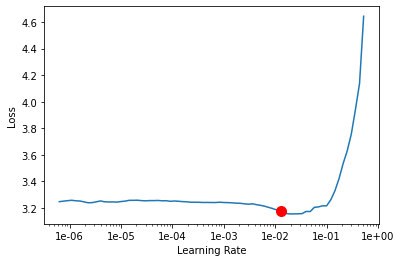

In [ ]:
learn_tab.recorder.plot(suggestion=True)

In [25]:
learn_tab.fit_one_cycle(1,max_lr=1e-02,
                        callbacks=[SaveModelCallback(learn_tab, every='improvement', monitor='accuracy', name='best')])

epoch,train_loss,valid_loss,accuracy,time
0,2.324803,2.251347,0.413111,00:06


Better model found at epoch 0 with accuracy value: 0.4131110906600952.


In [26]:
learn_tab.load('best')

Learner(data=TabularDataBunch;

Train: LabelList (26798 items)
x: TabularList
scheme http; base http://www.sixty8/; path /; params ; ext .com; ,scheme http; base http://www.abandonedcommunities/; path /; params ; ext .co.uk; ,scheme http; base http://www.greekthomson/; path /; params ; ext .com; ,scheme http; base http://www.arabbritishcentre/ ; path / ; params ; ext .org.uk; ,scheme http; base #na#; path /; params ; ext #na#; 
y: CategoryList
Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities
Path: .;

Valid: LabelList (8039 items)
x: TabularList
scheme http; base http://news.bbc/1/hi/england/2707593.stm; path /1/hi/england/2707593.stm; params ; ext .co.uk; ,scheme http; base http://news.bbc/1/hi/scotland/3215901.stm; path /1/hi/scotland/3215901.stm; params ; ext .co.uk; ,scheme http; base http://www.remembering/; path /; params ; ext .org.uk; ,scheme http; base http://www.rowntreesociety/; path /; params ; ext .org.uk; ,scheme http; base http://

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-03
Min loss divided by 10: 2.75E-03


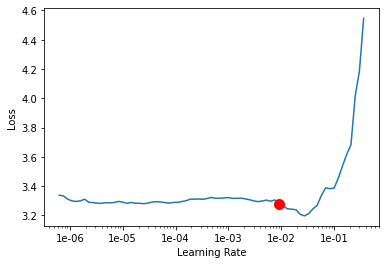

In [ ]:
#learn_tab.lr_find()
#learn_tab.recorder.plot(suggestion=True)

In [ ]:
#learn_tab.fit_one_cycle(10,max_lr=1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,1.569201,1.559716,0.550815,00:22
1,1.848951,1.427586,0.536012,00:22
2,1.721308,1.294271,0.545093,00:22
3,1.536363,1.171604,0.558030,00:22
4,1.330102,1.121279,0.567110,00:22


In [27]:
learn_tab.model.layers = learn_tab.model.layers[:-3]
learn_tab.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(4, 3)
    (1): Embedding(8661, 257)
    (2): Embedding(2779, 136)
    (3): Embedding(3, 3)
    (4): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.05, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=403, out_features=308, bias=True)
    (1): ReLU(inplace=True)
  )
)

# NLP

In [ ]:
df.head()

,Primary Category,Secondary Category,Title,URL,is_valid
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/,False
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/,False
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/,False
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/,False
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/,False


In [ ]:
df.Title.to_csv('lm.txt',index=None, sep=' ', mode='a')

In [ ]:
!pip install sentencepiece

In [ ]:
SPProcessor(max_vocab_sz=1000)

In [ ]:
dlm = TextList.from_folder('data/text',extensions='.txt', processor=[OpenFileProcessor(), SPProcessor(max_vocab_sz=1000, )])
dlm = dlm.split_none().label_for_lm().databunch(bs=1)
                        

RuntimeError: ignored

In [ ]:

class CharTokenizer(BaseTokenizer):
    def __init__(self, lang:str='no_lang'):
        '''Needed to initialize BaseTokenizer correctly.'''
        super().__init__(lang=lang)

    def tokenizer(self, t:str) -> List[str]:
        '''Turns each character into a token. Replaces spaces with '_'.'''
        return list(t.replace(' ', '_'))
    
char_tokenize_processor = TokenizeProcessor(tokenizer=Tokenizer(tok_func=CharTokenizer), include_bos=False)

In [29]:
data_nlp_lm = (TextList.
        from_df(df,path='.',cols=['Title']) #,processor=[OpenFileProcessor(), char_tokenize_processor, NumericalizeProcessor()])
        .split_from_df('is_valid')
        .label_for_lm()
        .databunch(bs=32))
                        

In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.0MB 5.9MB/s eta 0:00:01


In [ ]:
processor = [OpenFileProcessor(),SPProcessor(lang="en", vocab_sz = 100, tmp_dir='.')]

In [ ]:
data_nlp_lm = (TextList.
        from_df(df,path='.',cols=['Title'],processor=[OpenFileProcessor(), SPProcessor()])
        .split_from_df('is_valid')
        .label_for_lm()
        .databunch(bs=32))

FileNotFoundError: ignored

In [ ]:
!pi

In [ ]:
dlm.show_batch()

idx,text
0,"6 "" xxmaj architecture.com - from the xxmaj royal xxmaj institute of xxmaj british xxmaj architects ( xxup riba ) "" \n 7 "" xxmaj architecture.com : xxmaj royal xxmaj institute of xxmaj british xxmaj architects ( xxup xxunk ) xxmaj general xxmaj election 2010 "" \n 8 xxmaj architecture_media_politics_society \n 9 "" xxmaj artek xxmaj design xxmaj house xxmaj ltd "" \n 10 "" xxup"
1,"writers "" \n xxunk xxmaj xxunk \n xxunk "" xxmaj xxunk xxmaj xxunk "" \n xxunk "" xxmaj group for xxmaj literary xxmaj archives and xxmaj manuscripts - xxup glam "" \n xxunk "" xxmaj grumpy xxmaj old xxmaj bookman "" \n xxunk "" xxmaj gwasg xxmaj xxunk xxmaj xxunk "" \n xxunk xxmaj xxunk \n xxunk "" xxmaj hand + xxmaj star"
2,""" xxmaj international xxmaj cognition & xxmaj culture xxmaj institute ( xxup icci ) , xxmaj the "" \n xxunk "" xxmaj international xxmaj society for xxmaj science & xxmaj religion , xxmaj the "" \n xxunk "" xxmaj julian xxmaj baggini "" \n xxunk "" xxmaj living xxmaj life to the xxmaj full "" \n xxunk "" xxup mind - a xxmaj xxunk xxmaj review"
3,"electricity xxmaj producers ( xxup aep ) "" \n xxunk "" xxmaj association of xxmaj residential xxmaj letting xxmaj agents ( xxup arla ) "" \n xxunk "" astrazeneca xxmaj international "" \n xxunk xxmaj autonomy \n xxunk xxmaj aviva \n xxunk "" xxup bae xxmaj systems "" \n xxunk "" xxup bbc xxmaj blogs : xxmaj peston 's xxmaj picks "" \n"
4,"mayfair "" \n xxunk "" xxmaj adam xxmaj price xxup mp "" \n xxunk "" xxmaj african xxmaj arguments "" \n xxunk "" xxmaj age of xxmaj xxunk , xxmaj the "" \n xxunk "" xxmaj aine xxmaj cassidy - illustration blog "" \n xxunk "" xxmaj airminded - airpower and xxmaj british society 1908 - 1941 ( mostly ) "" \n xxunk """


In [30]:
LM_learn = language_model_learner(data_nlp_lm, Transformer, pretrained=True, drop_mult=0.5)

In [ ]:
LM_learn.lr_find()

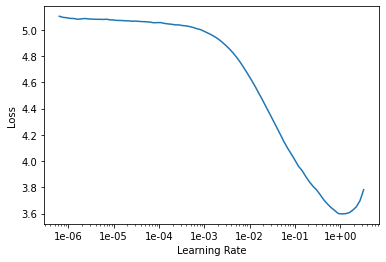

In [ ]:
LM_learn.recorder.plot()

In [ ]:
LM_learn.fit_one_cycle(5, max_lr=1e-01, 
                       callbacks=[SaveModelCallback(LM_learn, every='improvement', monitor='accuracy', name='LM')])

epoch,train_loss,valid_loss,accuracy,time
0,1.438208,1.320266,0.624101,00:48
1,1.428997,1.305189,0.624469,00:49
2,1.422615,1.274135,0.630239,00:51
3,1.358002,1.232496,0.640923,00:51
4,1.322951,1.216437,0.647798,00:52


Better model found at epoch 0 with accuracy value: 0.6241011619567871.
Better model found at epoch 1 with accuracy value: 0.6244685053825378.
Better model found at epoch 2 with accuracy value: 0.6302385926246643.
Better model found at epoch 3 with accuracy value: 0.6409226655960083.
Better model found at epoch 4 with accuracy value: 0.6477982401847839.


In [ ]:
LM_learn.load('LM')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (26798 items)
x: LMTextList
h t t p : _ / _ / _ w w w . s i x t y 8 . c o m _ / _,h t t p : _ / _ / _ w w w . a b a n d o n e d c o m m u n i t i e s . c o . u k _ / _,h t t p : _ / _ / _ w w w . g r e e k t h o m s o n . c o m _ / _,h t t p : _ / _ / _ w w w . a r a b b r i t i s h c e n t r e . o r g . u k _ / _,h t t p : _ / _ / _ w w w . a a s c h o o l . a c . u k _ / _
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (8039 items)
x: LMTextList
h t t p : _ / _ / _ b l o g . e c h u r c h w e b s i t e s . o r g . u k _ / _ 2 0 0 9 _ / _ 0 7 _ / _ 2 0 _ / _ c h u r c h - d o w n p l a y s - f l u - w o r r y - a d v i c e _ / _,h t t p : _ / _ / _ w w w . i c i - l o n d r e s . c o m _ / _,h t t p : _ / _ / _ n e w s . b b c . c o . u k _ / _ 1 _ / _ h i _ / _ w o r l d _ / _ e u r o p e _ / _ 8 0 8 5 7 8 1 . s t m,h t t p : _ / _ / _ a r c h i f . r h w y d . o r g _ / _ b y i g _ / _ t w i t t e r _ / _,h t t p : _ / _ / _ w 

In [ ]:
LM_learn.save_encoder('ft_enc')

In [ ]:
vocab= data_nlp_lm.train_ds.vocab

In [ ]:
#vocab = pickle.load(open(PATH/'itos', 'rb'))

In [32]:
# char based 
data_class = (TextList.
        from_df(df,path='.',cols=['Title']) #processor=[OpenFileProcessor(), char_tokenize_processor, NumericalizeProcessor()])
        .split_from_df('is_valid')
        .label_from_df('Primary Category')
        .databunch(bs=32))
                        

In [ ]:

"""
data_class = (TextList.
        from_df(df,path='.',cols=['url'],vocab=vocab)
                .split_from_df('is_valid')
        .label_from_df('Primary Category')
        .databunch(bs=32))

In [49]:
learn_nlp_class = text_classifier_learner(data_class,AWD_LSTM, drop_mult=0.5)
#learn_nlp_class.load_encoder('ft_enc')
#learn_nlp_class.lr_find()

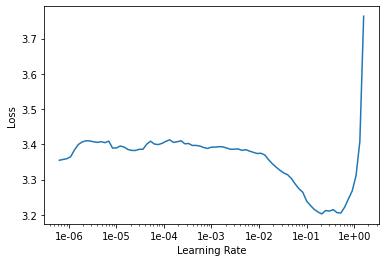

In [ ]:
learn_nlp_class.recorder.plot()

In [50]:
learn_nlp_class.fit_one_cycle(1, max_lr=1e-02,
                               callbacks=[SaveModelCallback(learn_nlp_class, every='improvement', monitor='accuracy', name='best_nlp_class')])

epoch,train_loss,valid_loss,accuracy,time
0,2.345124,2.355579,0.191815,00:15


Better model found at epoch 0 with accuracy value: 0.19181489944458008.


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


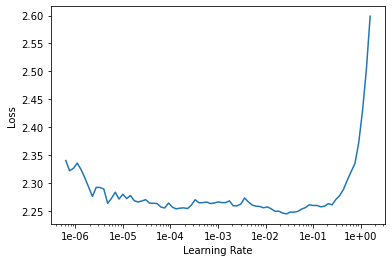

In [ ]:
learn_nlp_class.unfreeze()
learn_nlp_class.lr_find()
learn_nlp_class.recorder.plot()

In [ ]:
learn_nlp_class.fit_one_cycle(2, max_lr=slice(1e-04,1e-02),
                               callbacks=[SaveModelCallback(learn_nlp_class, every='improvement', monitor='accuracy', name='best_nlp_class')])

epoch,train_loss,valid_loss,accuracy,time
0,2.262107,2.166799,0.252146,00:45
1,2.237637,2.134634,0.285732,00:46


Better model found at epoch 0 with accuracy value: 0.25214579701423645.
Better model found at epoch 1 with accuracy value: 0.28573206067085266.


In [51]:
learn_nlp_class.load('best_nlp_class')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (26798 items)
x: TextList
xxbos 68 xxmaj dean xxmaj street,xxbos xxmaj abandoned xxmaj communities,xxbos xxmaj alexander xxmaj xxunk xxmaj society,xxbos xxmaj arab xxmaj british xxmaj centre , xxmaj the,xxbos xxmaj architectural xxmaj association xxmaj school of xxmaj architecture
y: CategoryList
Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities
Path: .;

Valid: LabelList (8039 items)
x: TextList
xxbos xxup bbc xxmaj news : xxmaj poet 's birthplace goes on sale,xxbos xxup bbc xxmaj news : xxmaj youth ' key ' to tackling racism,xxbos xxmaj xxunk xxmaj cheltenham - and all that was dear,xxbos xxmaj rowntree xxmaj society , xxmaj the,xxbos xxmaj michael xxmaj howard , xxmaj conservative xxmaj parliamentary xxmaj candidate , xxmaj folkestone and xxmaj hythe
y: CategoryList
Arts & Humanities,Society & Culture,Arts & Humanities,Arts & Humanities,Government, Law & Politics
Path: .;

Test: None, model=

# Model

In [ ]:
learn_nlp = learn_nlp_class

In [53]:
learn_nlp.model[-1].layers = learn_nlp.model[-1].layers[:-3] 
learn_nlp.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(6880, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(6880, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2, inplace=False)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace=True)
    )
  )
)

In [ ]:
data_nlp = data_class

In [ ]:
class ConcatDataset(Dataset):
    def __init__(self, x1, x2, y): 
        self.x1,self.x2,self.y = x1,x2,y
    def __len__(self): 
        return len(self.y)
    def __getitem__(self, i): 
        return (self.x1[i], self.x2[i]), self.y[i]

train_ds = ConcatDataset(data_tab.train_ds.x, data_nlp.train_ds.x, data_tab.train_ds.y)
valid_ds = ConcatDataset(data_tab.valid_ds.x, data_nlp.valid_ds.x, data_tab.valid_ds.y)

In [ ]:
def my_collate(batch):    
    x,y = list(zip(*batch))
    x1,x2 = list(zip(*x))
    x1 = to_data(x1)
    x1 = list(zip(*x1))
    x1 = torch.stack(x1[0]), torch.stack(x1[1])
    x2, y = pad_collate(list(zip(x2, y)), pad_idx=1, pad_first=True)
    return (x1, x2), y

In [ ]:
bs = 32
train_sampler = SortishSampler(data_nlp.train_ds.x, key=lambda t: len(data_nlp.train_ds[t][0].data), bs=bs//2)
valid_sampler = SortSampler(data_nlp.valid_ds.x, key=lambda t: len(data_nlp.valid_ds[t][0].data))

In [ ]:
train_dl = DataLoader(train_ds, bs//2, sampler=train_sampler)
valid_dl = DataLoader(valid_ds, bs, sampler=valid_sampler)
data = DataBunch(train_dl, valid_dl, device=defaults.device, collate_fn=my_collate, path='.')

In [59]:
(x1,x2),y = next(iter(data.train_dl))
print(f'Shape tabular batch (cats/cont): {x1[0].shape} / {x1[1].shape}')
print(f'Shape nlp batch: {x2.shape}')
print(f'Shape dependent var: {y.shape}')

Shape tabular batch (cats/cont): torch.Size([16, 5]) / torch.Size([16])
Shape nlp batch: torch.Size([16, 43])
Shape dependent var: torch.Size([16])


In [ ]:
class ConcatModel(nn.Module):
    def __init__(self, mod_tab, mod_nlp, layers, drops): 
        super().__init__()
        self.mod_tab = mod_tab
        self.mod_nlp = mod_nlp
        lst_layers = []
        activs = [nn.ReLU(inplace=True),] * (len(layers)-2) + [None]
        for n_in,n_out,p,actn in zip(layers[:-1], layers[1:], drops, activs):
            lst_layers += bn_drop_lin(n_in, n_out, p=p, actn=actn)
        self.layers = nn.Sequential(*lst_layers)

    def forward(self, *x):
        x_tab = self.mod_tab(*x[0])
        x_nlp = self.mod_nlp(x[1])[0]
        x = torch.cat([x_tab, x_nlp], dim=1)
        return self.layers(x)   

In [61]:
#lin_layers = [64+50, 24]
#lin_layers = [154+50, 24]
lin_layers = [308+50, 24]
ps = [0.8]
model = ConcatModel(learn_tab.model, learn_nlp.model, lin_layers, ps)
model

ConcatModel(
  (mod_tab): TabularModel(
    (embeds): ModuleList(
      (0): Embedding(4, 3)
      (1): Embedding(8661, 257)
      (2): Embedding(2779, 136)
      (3): Embedding(3, 3)
      (4): Embedding(5, 4)
    )
    (emb_drop): Dropout(p=0.05, inplace=False)
    (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layers): Sequential(
      (0): Linear(in_features=403, out_features=308, bias=True)
      (1): ReLU(inplace=True)
    )
  )
  (mod_nlp): SequentialRNN(
    (0): MultiBatchEncoder(
      (module): AWD_LSTM(
        (encoder): Embedding(6880, 400, padding_idx=1)
        (encoder_dp): EmbeddingDropout(
          (emb): Embedding(6880, 400, padding_idx=1)
        )
        (rnns): ModuleList(
          (0): WeightDropout(
            (module): LSTM(400, 1152, batch_first=True)
          )
          (1): WeightDropout(
            (module): LSTM(1152, 1152, batch_first=True)
          )
          (2): WeightDropout(
            (modu

In [ ]:
loss_func = nn.CrossEntropyLoss()
layer_groups = [nn.Sequential(*flatten_model(learn_nlp.layer_groups[0])),
                nn.Sequential(*flatten_model(learn_nlp.layer_groups[1])),
                nn.Sequential(*flatten_model(learn_nlp.layer_groups[2])),
                nn.Sequential(*flatten_model(learn_nlp.layer_groups[3])),
                nn.Sequential(*(flatten_model(learn_nlp.layer_groups[4]) + 
                                flatten_model(model.mod_tab) +
                                flatten_model(model.layers)))] 
learn = Learner(data, model, loss_func=loss_func, metrics=accuracy, layer_groups=layer_groups)

In [48]:
learn.freeze()
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


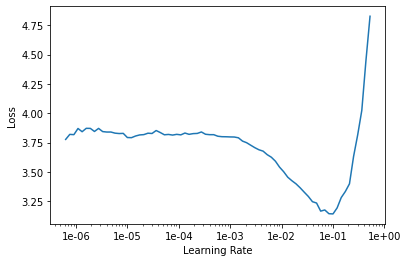

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,1.402699,1.109329,0.548451,00:46
1,1.521871,1.137419,0.543351,00:47
2,1.646189,1.191252,0.550690,00:47
3,1.666075,1.235720,0.547954,00:45
4,1.679485,1.246159,0.540241,00:46
5,1.557496,1.176806,0.546212,00:48
6,1.425075,1.116077,0.552929,00:46
7,1.257701,1.093445,0.558776,00:44
8,1.219871,1.067080,0.558154,00:45
9,1.189977,1.063293,0.553800,00:45


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


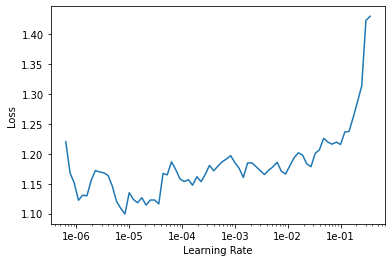

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(20, max_lr=slice(1e-06,1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,2.154785,1.996780,0.344819,00:42
1,2.150648,1.925855,0.373927,00:37
2,2.127147,1.796872,0.417962,00:40
3,1.978430,1.635888,0.486628,00:36
4,1.923321,1.552470,0.526060,00:37
5,1.728180,1.366838,0.532156,00:36
6,1.697628,1.310562,0.546585,00:37
7,1.558554,1.249283,0.549820,00:37
8,1.455575,1.216132,0.557408,00:36
9,1.377270,1.208221,0.552307,00:41


In [ ]:
learn.unfreeze()
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


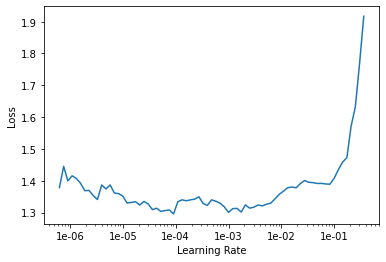

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(40, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,1.354676,8.244788,0.551437,01:12
1,1.370105,4.614803,0.562757,01:11
2,1.453841,27.698277,0.503918,01:10
3,1.471304,45.811272,0.549571,01:15
4,1.547634,24.826250,0.537007,01:12
5,1.590112,24.786783,0.516855,01:13
6,1.626742,16.384668,0.552929,01:16
7,1.689581,9.078578,0.539744,01:17
8,1.778752,22.825178,0.487001,01:12
9,1.650085,7.698392,0.535514,01:09


In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(20, slice(1e-05,1e-03))